# Модель классификации аниме-персонажей
В данном блокноте описан процесс обработки изображений персонажей из различных аниме и создание классифицирующих данных персонажей модели.
В блокноте используются следующие библиотеки: numpy, matplotlib, tensorflow, keras.

Обработка изображений происходит с использованием метода предобработки из библиотеки tensorflow.keras.preprocessing.image import ImageDataGenerator.
Последующее создание модели происходит с использованием следующих слоев из библиотеки keras: Conv2D, MaxPooling2D, Flatten, Dense

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

2024-04-06 08:59:44.025374: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
batch_size = 32 # размер батча
epochs = 20 #эпохи 
img_height = 150 #размерность изображения
img_width = 150 #

train_dir = './images' #путь к папкам

#генератор изображений
train_image_generator = ImageDataGenerator(rescale=1./255)  # Масштабируем значения пикселей

character_names = ["Aqua", "Tatsumaki", "Ruby", "Rose", "Lain"] #Персонажиков названия

In [3]:
#выгружаем из папки изображения и делаем крутые вещи
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(img_height, img_width),
    class_mode='categorical')

Found 50 images belonging to 5 classes.


In [11]:
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)), #используется для уменьшения размерности данных путем выбора максимального значения из набора значений в определенной области
    Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(), #преобразует данные из многомерного массива (например, двумерного массива, созданного после сверточных слоев) в одномерный массив. Он принимает входные данные с размерностью (batch_size, dim1, dim2, ..., dimN) и выравнивает их в одномерный массив размером (batch_size, dim1 * dim2 * ... * dimN).
    Dense(512, activation='relu'),
    Dense(5, activation='softmax') # 5 выходных классов персонажей
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Обучаем модель
model.fit(train_data_gen, epochs=epochs)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 699ms/step - accuracy: 0.1489 - loss: 2.6618
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - accuracy: 0.2092 - loss: 2.8297
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 465ms/step - accuracy: 0.3812 - loss: 1.9196
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 439ms/step - accuracy: 0.3783 - loss: 1.3793
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 831ms/step - accuracy: 0.5319 - loss: 1.2410
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 925ms/step - accuracy: 0.5985 - loss: 1.1332
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 817ms/step - accuracy: 0.7329 - loss: 0.8606
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 869ms/step - accuracy: 0.8911 - loss: 0.6612
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 597ms/step - accuracy: 0.9762 - loss: 0.3467
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 672ms/step - accuracy: 0.9867 - loss: 0.2092
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 565ms/step - accuracy: 0.9867 - loss: 0.1174
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 413ms/step - accuracy: 0.9762 - lo

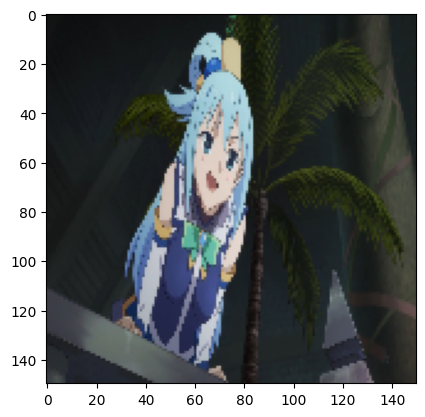

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([0])

In [13]:
num = 4

# Получаем пакет данных из генератора
images, labels = next(train_data_gen)
# Преобразуем одно изображение в пакет изображений размером 1
image_batch = np.expand_dims(images[num], axis=0)

# Показываем первое изображение из пакета
plt.imshow(images[num])
plt.show()

# Предсказываем классы для пакета изображений
predicted_classes = np.argmax(model.predict(image_batch), axis=1)
predicted_classes

Found 13 images belonging to 5 classes.


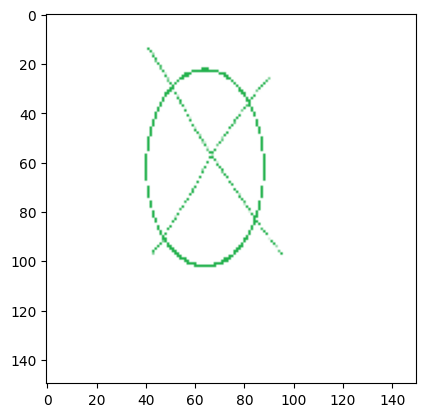

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'Aqua'

In [14]:
#0 - Аквочка (коносуба), 1 - Тацумаки (ванпанчмен), 2 - Руби (Звездное дитя), 3 - Руби Роуз (RWBY), 4 - Лейн (эксперименты Лейн)
test_dir = './test_images'
test_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=test_dir,
    shuffle=False,
    target_size=(img_height, img_width),
    class_mode='categorical')

num = 5

# Получаем пакет данных из генератора
images, labels = next(test_data_gen)
# Преобразуем одно изображение в пакет изображений размером 1
image_batch = np.expand_dims(images[num], axis=0)

# Показываем первое изображение из пакета
plt.imshow(images[num])
plt.show()

# Предсказываем классы для пакета изображений
predicted_classes = np.argmax(model.predict(image_batch), axis=1)
character_names[predicted_classes[0]]

In [15]:
predicted_classes = np.argmax(model.predict(images), axis=1)
predicted_classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


array([0, 4, 0, 0, 1, 0, 2, 2, 3, 3, 0, 0, 0])

In [16]:
images, labels = next(test_data_gen)#получаем пакет данных из генератора

predicted_classes = np.argmax(model.predict(images), axis=1)#предсказываем классы для пакета изображений

correct_predictions = np.sum(predicted_classes == np.argmax(labels, axis=1))#количество правильно предсказанных классов

accuracy = correct_predictions / len(images) # точность

print("Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Accuracy: 0.5384615384615384
